# IMPORT

In [2]:
%matplotlib notebook
from utils.setup import *

# CREATION DATAFRAMES

In [3]:
TARGETS

['RES1_BASE',
 'RES11_BASE',
 'RES2_HC',
 'RES2_HP',
 'PRO1_BASE',
 'PRO2_HC',
 'PRO2_HP']

In [30]:
train = pd.read_csv(TRAIN_MERGED, index_col=0)
train['ds'] = train.index

# PROPHET

In [33]:
import fbprophet

In [9]:
start1 = '2013-10-12 22:00:00'
start2 = '2016-10-30 23:00:00'
end = '2018-10-12 21:30:00'
future = pd.DataFrame(pd.date_range(start=start1, end=end, freq='30min'),columns=['ds'])
future2 = pd.DataFrame(pd.date_range(start=start2, end=end, freq='30min'),columns=['ds'])

In [10]:
def fill_trend(df,forecast,target):
    
    df = df.set_index(df.Horodate)
    forecast = forecast.set_index(forecast.ds)
    cols = list(forecast.columns)
    cols.remove('yhat')
    df = pd.merge(df,forecast, left_index=True, right_index=True)
    df.drop(cols,axis=1,inplace=True)
    
    if target in list(df.columns):
        cols = list(df.columns)
        cols.remove(target)
        cols.append(target)
        df = df[cols]
        
    df.reset_index(inplace=True)
    df.drop('index',axis=1,inplace=True)
    
    return df

In [11]:
import holidays

hol = {'ds':[],'holiday':[]}

for date, name in sorted(holidays.FRA(years=list(range(2013,2020))).items()):
    hol['ds'].append(date)
    hol['holiday'].append(name)

french_holidays = pd.DataFrame(hol,columns=['ds','holiday'])
french_holidays.head()

,ds,holiday
0,2013-01-01,Jour de l'an
1,2013-04-01,Lundi de Pâques
2,2013-05-01,Fête du Travail
3,2013-05-08,Armistice 1945
4,2013-05-09,Ascension


In [43]:
data = train[['ds', 'RES1_BASE']]
data.reset_index(inplace=True, drop=True)
data.rename(columns={'RES1_BASE':'y'}, inplace=True)
future = pd.DataFrame(pd.date_range(start=data.iloc[0]['ds'], end=data.iloc[-1]['ds'], freq='30min'),columns=['ds'])
model = fbprophet.Prophet()
model.fit(data)
forecast = model.predict(future)
trend = forecast['yhat']
model.plot(forecast,xlabel='Date',ylabel='RES1_BASE')

/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/home_nfs/mcaitucoli-2047/.local/lib64/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


In [45]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2013-10-13 00:00:00,1.192758,1.192758,1.192758,0.799894,1.091195,-0.240436,-0.240436,-0.240436,-0.227281,-0.227281,-0.227281,0.0,0.0,0.0,0.023972,0.023972,0.023972,-0.037127,-0.037127,-0.037127,0.952322
1,2013-10-13 00:30:00,1.192717,1.192717,1.192717,0.755419,1.043135,-0.297254,-0.297254,-0.297254,-0.283017,-0.283017,-0.283017,0.0,0.0,0.0,0.022823,0.022823,0.022823,-0.037061,-0.037061,-0.037061,0.895463
2,2013-10-13 01:00:00,1.192677,1.192677,1.192677,0.703705,0.996783,-0.340118,-0.340118,-0.340118,-0.324781,-0.324781,-0.324781,0.0,0.0,0.0,0.021657,0.021657,0.021657,-0.036994,-0.036994,-0.036994,0.852559
3,2013-10-13 01:30:00,1.192636,1.192636,1.192636,0.670887,0.971626,-0.374567,-0.374567,-0.374567,-0.358115,-0.358115,-0.358115,0.0,0.0,0.0,0.020476,0.020476,0.020476,-0.036927,-0.036927,-0.036927,0.818070
4,2013-10-13 02:00:00,1.192596,1.192596,1.192596,0.636961,0.932774,-0.404883,-0.404883,-0.404883,-0.387303,-0.387303,-0.387303,0.0,0.0,0.0,0.019280,0.019280,0.019280,-0.036861,-0.036861,-0.036861,0.787712
5,2013-10-13 02:30:00,1.192555,1.192555,1.192555,0.613420,0.902832,-0.432705,-0.432705,-0.432705,-0.413984,-0.413984,-0.413984,0.0,0.0,0.0,0.018072,0.018072,0.018072,-0.036794,-0.036794,-0.036794,0.759850
6,2013-10-13 03:00:00,1.192514,1.192514,1.192514,0.597578,0.889518,-0.456598,-0.456598,-0.456598,-0.436724,-0.436724,-0.436724,0.0,0.0,0.0,0.016854,0.016854,0.016854,-0.036728,-0.036728,-0.036728,0.735916
7,2013-10-13 03:30:00,1.192474,1.192474,1.192474,0.572327,0.861523,-0.472656,-0.472656,-0.472656,-0.451621,-0.451621,-0.451621,0.0,0.0,0.0,0.015626,0.015626,0.015626,-0.036661,-0.036661,-0.036661,0.719818
8,2013-10-13 04:00:00,1.192433,1.192433,1.192433,0.567016,0.853317,-0.475892,-0.475892,-0.475892,-0.453689,-0.453689,-0.453689,0.0,0.0,0.0,0.014392,0.014392,0.014392,-0.036595,-0.036595,-0.036595,0.716541
9,2013-10-13 04:30:00,1.192393,1.192393,1.192393,0.595984,0.873782,-0.461984,-0.461984,-0.461984,-0.438606,-0.438606,-0.438606,0.0,0.0,0.0,0.013151,0.013151,0.013151,-0.036528,-0.036528,-0.036528,0.730409


limit_output extension: Maximum message size of 10000 exceeded with 35680 characters

In [25]:
%matplotlib inline

/home_nfs/mcaitucoli-2047/.local/lib64/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


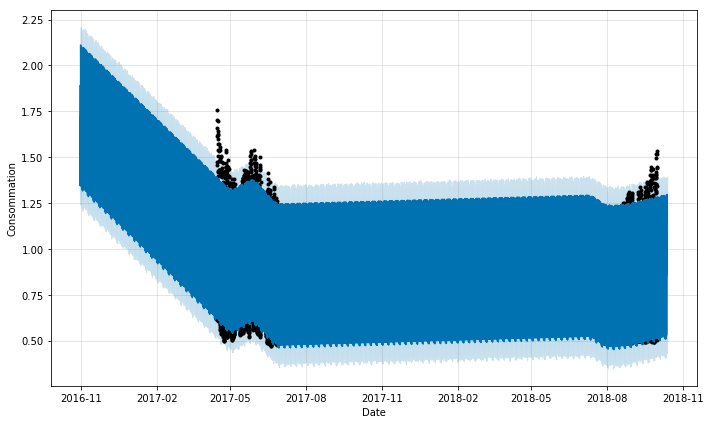

/home_nfs/mcaitucoli-2047/.local/lib64/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


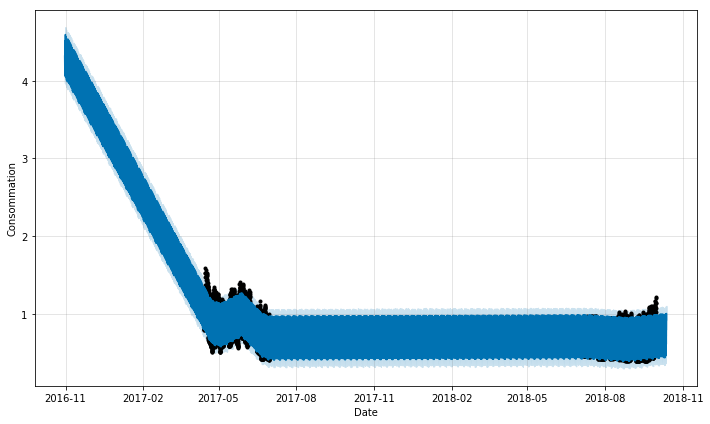

/home_nfs/mcaitucoli-2047/.local/lib64/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


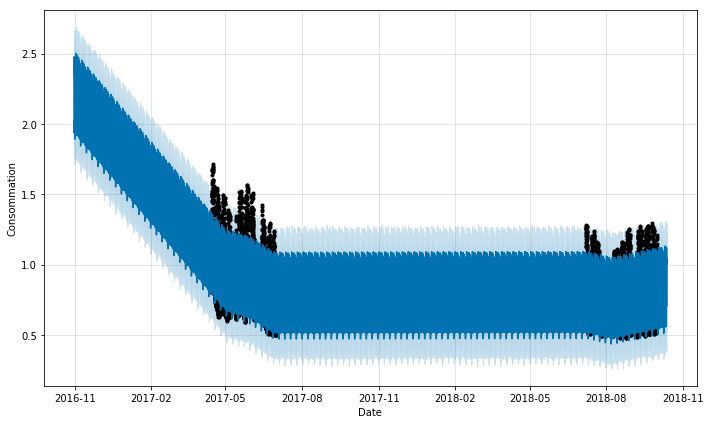

/home_nfs/mcaitucoli-2047/.local/lib64/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


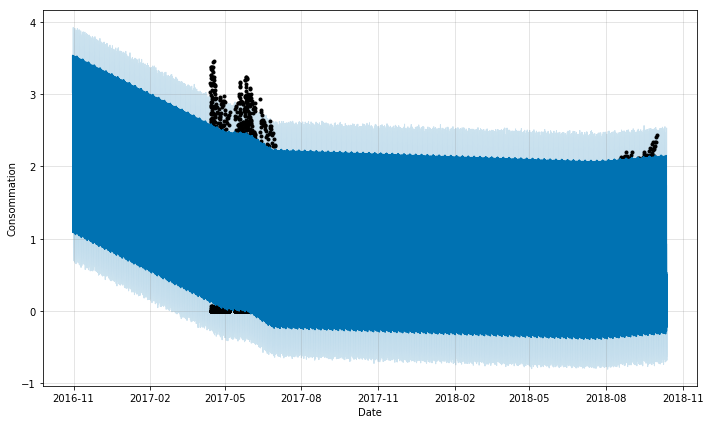

/home_nfs/mcaitucoli-2047/.local/lib64/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


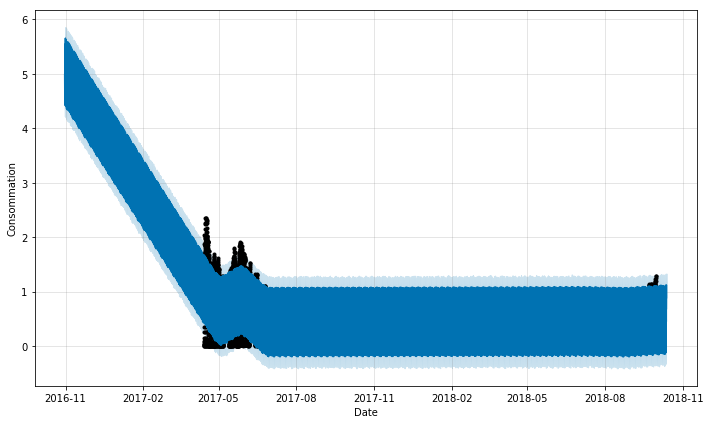

/home_nfs/mcaitucoli-2047/.local/lib64/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


KeyboardInterrupt: 

In [26]:
%%time

i=0
models = []
forecasts = []

for data in datas:

    data.reset_index(inplace=True)
    data = data.rename(columns={'date':'ds','conso':'y'})
    model = fbprophet.Prophet()
    model.fit(data)
    if len(data.index)>60000:
        forecast = model.predict(future1)
    else:
        forecast = model.predict(future2)
    trend = forecast['yhat']
    model.plot(forecast,xlabel='Date',ylabel='Consommation')
    plt.show()
    dfs[i] = fill_trend(dfs[i],forecast,targets[i])
    dfs_test[i] = fill_trend(dfs_test[i],forecast,targets[i])
    models.append(model)
    forecasts.append(forecast)
    
    #EXPORT
    
    pd.DataFrame.to_csv(dfs[i],'df_train_trend'+str(i)+'v3.0.csv',sep=',',index=False)
    pd.DataFrame.to_csv(dfs_test[i],'df_test_trend'+str(i)+'v3.0.csv',sep=',',index=False)
    
    i+=1
   

In [14]:
dfs[0]['yhat'] = dfs[0]['yhat_x']

KeyError: 'yhat_x'

In [34]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

In [35]:
for df in dfs:
    target = df.columns[-1]
    df1[target] = df['yhat']
    df2[target] = df[target]
    
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [36]:
from enedis_custom_metric_example import custom_metric_function
custom_metric_function(df1,df2)

17700.065